# A brief demonstration of the double spike toolbox
This is a quick guide to the main features of the double spike toolbox for python. The package uses the numpy, scipy, and matplotlib libraries. 

In [1]:
import doublespike as ds
import matplotlib.pyplot as plt
import numpy as np

# IsoData

A python object called `IsoData` is used to store data on the different isotopes systems. It can be invoked with a string giving the element name. The object is initialised with a number of sensible default values, but these can then be altered by the user. Information in `IsoData` includes the isotope numbers, the atomic masses, the standard composition, and the default error model coefficients. The default information stored about Fe is shown below.

In [2]:
isodata_fe = ds.IsoData('Fe')
print(isodata_fe)

element: Fe
 isonum: [54 56 57 58]
 mass: [53.9396148 55.9349421 56.9353987 57.9332805]
 standard: [0.05845 0.91754 0.02119 0.00282]
 rawspike: [[9.83719674e-01 1.55003100e-02 7.00014000e-04 8.00016000e-05]
 [6.99300699e-04 9.98801199e-01 3.99600400e-04 9.99000999e-05]
 [1.00000000e-03 6.97000000e-02 9.28800000e-01 5.00000000e-04]
 [3.90000000e-03 1.37800000e-01 1.25000000e-02 8.45800000e-01]]
 spike: None
 isoinv: [54 56 57 58]
 errormodel: {'measured': {'type': 'fixed-total', 'intensity': 10.0, 'a': array([2.0709756e-10, 2.0709756e-10, 2.0709756e-10, 2.0709756e-10]), 'b': array([2.00272058e-09, 2.00272058e-09, 2.00272058e-09, 2.00272058e-09]), 'c': array([0., 0., 0., 0.])}, 'spike': {'type': 'fixed-total', 'intensity': 10.0, 'a': array([0., 0., 0., 0.]), 'b': array([0., 0., 0., 0.]), 'c': array([0., 0., 0., 0.])}, 'standard': {'type': 'fixed-total', 'intensity': 10.0, 'a': array([0., 0., 0., 0.]), 'b': array([0., 0., 0., 0.]), 'c': array([0., 0., 0., 0.])}}


The stored data can be accessed and set through the object attributes. For example, shown below for Fe are the isotope numbers, standard composition, the atomic masses, and the third and fourth Oak Ridge National Labs (ORNL) spike compositions (corresponding to the 57Fe and 58Fe spikes). Note that all values are expressed as proportions of each isotope, rather than as isotopic ratios. Note also that python indexing starts from 0, so that the index 2 corresponds to the third spike.

In [3]:
print(isodata_fe.isonum)
print(isodata_fe.standard)
print(isodata_fe.mass)
print(isodata_fe.rawspike[2,:]) # third ORNL single spike composition
print(isodata_fe.rawspike[3,:]) # fourth ORNL single spike composition

[54 56 57 58]
[0.05845 0.91754 0.02119 0.00282]
[53.9396148 55.9349421 56.9353987 57.9332805]
[1.000e-03 6.970e-02 9.288e-01 5.000e-04]
[0.0039 0.1378 0.0125 0.8458]


## 2D Error surfaces 1
The function `errorcurve2d` plots a 2D error surface as a contour plot, showing how the error varies with both double spike to sample mixture proportions and the proportions in which the two single spikes are mixed to make the double spike. The example below is for a 57Fe-58Fe double spike, using pure spikes.

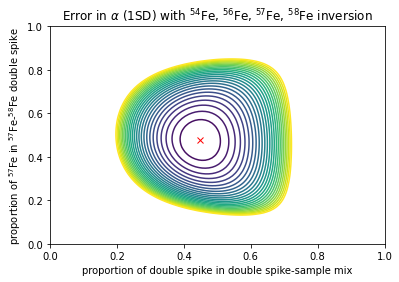

In [4]:
ds.errorcurve2d(isodata_fe,'pure',[57,58])

## 2D Error surfaces 2
Calculations can also be performed using real spikes rather than hypothetical pure spikes. Below is an example using the third and fourth ORNL spikes (corresponding to 57Fe and 58Fe spikes). This produces Figure 2 in the manuscript. Spike purity usually has only a little effect.

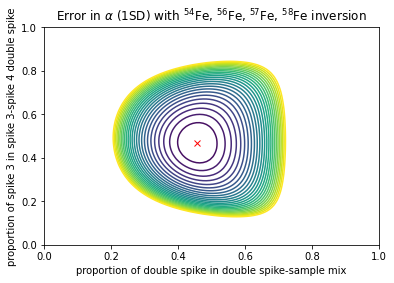

In [5]:
ds.errorcurve2d(isodata_fe,'real',[2,3])

## 2D Error surfaces 3
Some isotopes have more than four isotopes, and in these cases the isotopes to use in the inversion must be specified. Here is an example for Ca, with a 42Ca-48Ca double spike and 40Ca, 42Ca, 44Ca, 48Ca used in inversion. The second and sixth ORNL spikes are the 42Ca and 48Ca spikes. This produces Figure 5 in the manuscript.

spike 2: [4.87951205e-02 9.44805519e-01 6.99930007e-04 5.49945005e-03
 9.99900010e-05 9.99900010e-05]
spike 6: [2.09966405e-02 2.39961606e-04 9.99840026e-05 7.19884818e-04
 9.99840026e-05 9.77843545e-01]


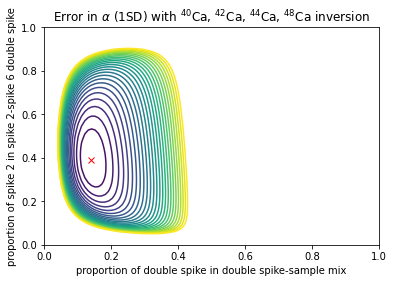

In [6]:
isodata_ca = ds.IsoData('Ca')
print("spike 2:", isodata_ca.rawspike[1,:])
print("spike 6:", isodata_ca.rawspike[5,:])
ds.errorcurve2d(isodata_ca,'real',[1,5],[40,42,44,48])

## Error curves 1
The function `errorcurve` plots the error in either the fractionation factor $\alpha$ or a chosen ratio as a function of the double spike to sample proportion. Note again that all compositions are specified by proportions of each isotope rather than by ratios. Here we look at the error curve for a double spike which is 50% 57Fe and 50% 58Fe.

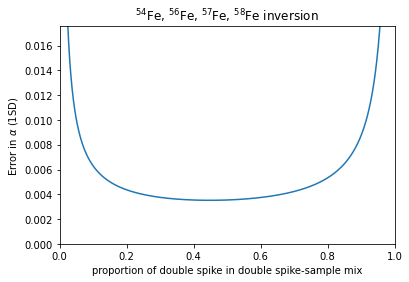

In [7]:
spike = [0,0,0.5,0.5]
ds.errorcurve(isodata_fe,spike)

## Error curves 2
The function `errorcurve2` plots the error in either the fractionation factor alpha or a chosen ratio as a function of the proportion of the two single spikes that make the double spike. The proportion in which double spike and sample are mixed must be specified, as must the single spikes to use. We give an example here for a pure 57Fe-58Fe double spike with 50% double spike to 50% sample.

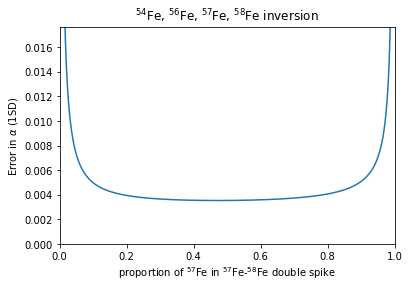

In [8]:
ds.errorcurve2(isodata_fe,'pure',0.5,[57,58])

## Optimal spikes 1
The function `optimalspike` finds double spike compositions which minimise the error on alpha or a chosen ratio. This can be done either for pure spikes, or with the real spikes in the `rawspike` attribute. The following example finds the best 57Fe-58Fe spike using the real spikes available from ORNL. The 3rd and 4th spikes correspond to the 57Fe and 58Fe spikes. The optimal double spike turns out to be quite close to a 50-50 mix of the available spikes (optspikeprop). The actual double spike compositions are in optspike, the optimal double spike-sample mixing proportions in optprop, the error estimates in opterr, rescaled error estimates in optppmperamu, and the isotopes that were used in the inversion in optisoinv.

In [9]:
ds.optimalspike(isodata_fe,'real',[2,3])

{'optspike': array([[0.00254291, 0.10593167, 0.44129518, 0.45023024]]),
 'optprop': array([0.45740009]),
 'opterr': array([0.00364393]),
 'optisoinv': array([[54, 56, 57, 58]]),
 'optspikeprop': array([[0.        , 0.        , 0.46796375, 0.53203625]]),
 'optppmperamu': array([64.85500893])}

## Optimal spikes 2
If the isotopes to spike are not specified, the `optimalspike` function checks all possible combinations. An example for Fe pure spikes is shown below. This produces Table 1 in the manuscript.

In [10]:
ds.optimalspike(isodata_fe,'pure')

{'optspike': array([[0.        , 0.77284059, 0.        , 0.22715941],
        [0.        , 0.        , 0.4764822 , 0.5235178 ],
        [0.        , 0.75304963, 0.24695037, 0.        ],
        [0.79960029, 0.        , 0.        , 0.20039971],
        [0.44872718, 0.55127282, 0.        , 0.        ],
        [0.70228952, 0.        , 0.29771048, 0.        ]]),
 'optprop': array([0.55403175, 0.44861195, 0.69157286, 0.21479339, 0.39818633,
        0.23064088]),
 'opterr': array([0.00321011, 0.00351008, 0.00450082, 0.00930262, 0.01086182,
        0.02632453]),
 'optisoinv': array([[54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58]]),
 'optspikeprop': array([[0.        , 0.77284059, 0.        , 0.22715941],
        [0.        , 0.        , 0.4764822 , 0.5235178 ],
        [0.        , 0.75304963, 0.24695037, 0.        ],
        [0.79960029, 0.        , 0.        , 0.20039971],
        [0.4487271

## Optimal spikes 3
An example for Fe ORNL spikes is shown below. This produces Table 2 in the manuscript.

In [11]:
ds.optimalspike(isodata_fe,'real')

{'optspike': array([[1.45429838e-03, 7.95703736e-01, 3.25390590e-03, 1.99588060e-01],
        [2.54290513e-03, 1.05931669e-01, 4.41295181e-01, 4.50230245e-01],
        [7.74853306e-04, 7.65358629e-01, 2.33666090e-01, 2.00427738e-04],
        [7.86334902e-01, 4.01375949e-02, 3.07712237e-03, 1.70450381e-01],
        [4.29314700e-01, 5.70063490e-01, 5.30586388e-04, 9.12239792e-05],
        [6.90601168e-01, 3.16666010e-02, 2.77526956e-01, 2.05275681e-04]]),
 'optprop': array([0.55855293, 0.45740009, 0.69608496, 0.21207999, 0.40138998,
        0.23277739]),
 'opterr': array([0.00331882, 0.00364393, 0.00463996, 0.00950555, 0.01105119,
        0.02671855]),
 'optisoinv': array([[54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58],
        [54, 56, 57, 58]]),
 'optspikeprop': array([[0.        , 0.76411477, 0.        , 0.23588523],
        [0.        , 0.        , 0.46796375, 0.53203625],
        [0.        , 0.74874366, 0.251

## Optimal spikes 4
By default, `optimalspike` minimises the error on alpha, but for radiogenic work we often wish to minimise the error on a particular ratio. An example of this is Pb. Shown below is the result of minimising the error on 206Pb/204Pb. This produces part of Table 3 in the manuscript.

In [12]:
isodata_pb = ds.IsoData('Pb')
ds.optimalspike(isodata_pb,'pure',errorratio=[206,204])

{'optspike': array([[0.63441115, 0.        , 0.36558885, 0.        ],
        [0.72898518, 0.27101482, 0.        , 0.        ],
        [0.        , 0.71830025, 0.28169975, 0.        ],
        [0.22189926, 0.        , 0.        , 0.77810074],
        [0.        , 0.        , 0.10927952, 0.89072048],
        [0.        , 0.37676206, 0.        , 0.62323794]]),
 'optprop': array([0.51237535, 0.5072805 , 0.52742371, 0.56289577, 0.61498001,
        0.53368829]),
 'opterr': array([0.00311977, 0.00319128, 0.00343693, 0.00454509, 0.00480344,
        0.00555983]),
 'optisoinv': array([[204, 206, 207, 208],
        [204, 206, 207, 208],
        [204, 206, 207, 208],
        [204, 206, 207, 208],
        [204, 206, 207, 208],
        [204, 206, 207, 208]]),
 'optspikeprop': array([[0.63441115, 0.        , 0.36558885, 0.        ],
        [0.72898518, 0.27101482, 0.        , 0.        ],
        [0.        , 0.71830025, 0.28169975, 0.        ],
        [0.22189926, 0.        , 0.        , 0.77810

## Optimal spikes 5
For elements with more than four isotopes, such as Ca, `optimalspike` tries all combinations of four isotopes in the inversion. This produces Table 4 in the manuscript. We only display the first 31 rows of the optimal spike composition.

In [13]:
os = ds.optimalspike(isodata_ca,'pure')
print(os['optspike'][0:31,:])

[[0.         0.39639725 0.         0.         0.         0.60360275]
 [0.         0.46424839 0.         0.         0.53575161 0.        ]
 [0.         0.         0.43534086 0.         0.         0.56465914]
 [0.         0.         0.48983764 0.         0.51016236 0.        ]
 [0.         0.         0.         0.16050323 0.         0.83949677]
 [0.         0.         0.         0.15500241 0.         0.84499759]
 [0.         0.         0.         0.15407932 0.         0.84592068]
 [0.         0.         0.         0.         0.47249243 0.52750757]
 [0.         0.         0.         0.22975212 0.77024788 0.        ]
 [0.         0.         0.         0.22380252 0.77619748 0.        ]
 [0.         0.         0.         0.21621117 0.78378883 0.        ]
 [0.         0.48265354 0.51734646 0.         0.         0.        ]
 [0.         0.2126147  0.         0.         0.7873853  0.        ]
 [0.         0.         0.37656792 0.         0.62343208 0.        ]
 [0.         0.29328132 0.70671868

## Optimal error curves 1
The function `errorcurveoptimalspike` calculates the `optimalspike` and then plots the `errorcurve`.

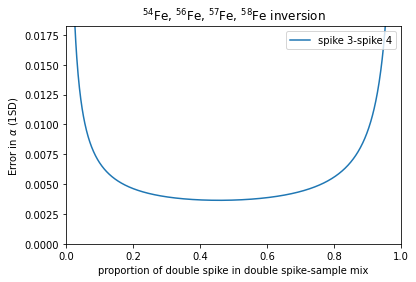

In [14]:
ds.errorcurveoptimalspike(isodata_fe,'real',[2,3])

## Optimal error curves 2
If the isotopes to spike are not specified, all possible combinations are shown. This produces Figure 3 in the manuscript.

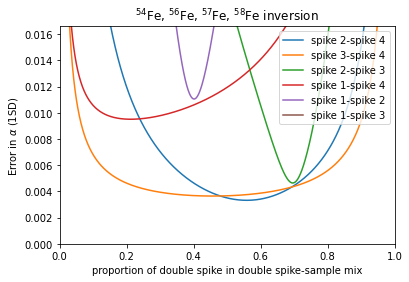

In [15]:
ds.errorcurveoptimalspike(isodata_fe,'real')

## Monte Carlo fake mass spec runs
`monterun` performs Monte Carlo fake mass spec runs.
The example below uses a 50-50 spike-sample mix, the pure 50-50 57Fe-58Fe spike used earlier, a natural fractionation of -0.2, an instrumental fractionation of 1.8, with 1000 Monte Carlo samples. The first 10 mixture measurements are shown.

In [16]:
measured = ds.monterun(isodata_fe,0.5,spike,-0.2,1.8,1000)
measured[0:10,:]

array([[0.26570082, 4.48591755, 2.63012728, 2.61788984],
       [0.2657654 , 4.48589492, 2.63038813, 2.61788382],
       [0.26571003, 4.48600424, 2.63039495, 2.61798987],
       [0.26574176, 4.48606463, 2.63036579, 2.61784567],
       [0.26579433, 4.48585176, 2.63036056, 2.61795912],
       [0.26576466, 4.48592394, 2.63037426, 2.61783729],
       [0.26579299, 4.48606777, 2.63031022, 2.61795185],
       [0.26574196, 4.48605664, 2.63036903, 2.61795082],
       [0.26573525, 4.48591102, 2.6303835 , 2.61788985],
       [0.26568764, 4.48589354, 2.63039383, 2.61793326]])

## Double spike inversions
`dsinversion` performs the double spike inversion. Here we run the double spike inversion on the Monte-Carlo generated data with the chosen spike. We then produce a figure showing how the value of alpha varies over the run.

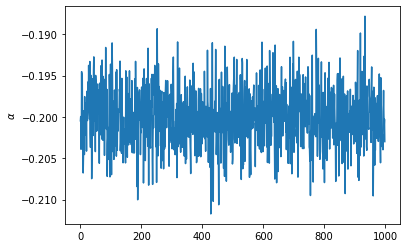

In [17]:
out = ds.dsinversion(isodata_fe,measured,spike)
plt.plot(out['alpha'])
plt.ylabel(r'$\alpha$');

## Error estimates
The `errorestimate` routine estimates the errors by linear error propagation. Here we compare the error obtained from the Monte-Carlo simulation with that predicted by linear error propagation. The fact that these are close is a good validation of the linear error propagation method.

In [18]:
monteerror = np.std(out['alpha'])
predictederror = ds.errorestimate(isodata_fe,0.5,spike, alpha=-0.2,beta=1.8)[0]
print("Monte Carlo error:", monteerror,"\nPredicted error:", predictederror)

Monte Carlo error: 0.0036444549072750776 
Predicted error: 0.0036364520647345615


## Error model 1
The coefficients of the error model are contained in the `errormodel` attribute of the `IsoData` object. The coefficients can be specified for the measured, standard (unspiked run), and double spike compositions. See Appendix C of the manuscript for their definition. The choice of error model is a key part of determining what makes an optimal spike, and the user should carefully consider the assumptions implicit in any error model and decide whether they are appropriate for their system. 

In [19]:
isodata_fe.set_errormodel(R = 1e11, deltat = 8)
isodata_fe.errormodel['measured']

{'type': 'fixed-total',
 'intensity': 10.0,
 'a': array([2.0709756e-10, 2.0709756e-10, 2.0709756e-10, 2.0709756e-10]),
 'b': array([2.00272058e-09, 2.00272058e-09, 2.00272058e-09, 2.00272058e-09]),
 'c': array([0., 0., 0., 0.])}

The error model set above fixes the total intensity of the mixture measurement to be 10 V, and the coefficients $a$, $b$, and $c$ correspond to those in (34) in the manuscript. The errors incorporate Johnson–Nyquist noise and counting statistics for a resistance $R = 10^{11}$  Ω and an integration time $\Delta t=8$ s.

## Error model 2
The function `set_errormodel` can be used to simply change the intensity for the error model. In the example below, a doubling of the intensity decreases the error by roughly a factor of $1/\sqrt{2}$.

In [20]:
isodata_fe.set_errormodel(intensity = 10)
error1 = ds.errorestimate(isodata_fe,0.5,spike,alpha=-0.2,beta=1.8)[0]
print("Error 1:", error1)
isodata_fe.set_errormodel(intensity = 20)
error2 = ds.errorestimate(isodata_fe,0.5,spike,alpha=-0.2,beta=1.8)[0]
print("Error 2:", error2)
print("Error 2/Error 1:", error2/error1)
isodata_fe.set_errormodel() # return error model to defaults

Error 1: 0.0036364520647345615
Error 2: 0.002457105485500852
Error 2/Error 1: 0.6756875772760133


## Error model 3
The default error model of the double spike toolbox fixes the total voltage of the beams for the overall mixture at a given level. When sample-limited it may be more appropriate to consider an error model where the voltage for the sample is fixed (see [John 2012, J. Anal. At. Spectrom.](https://doi.org/10.1039/C2JA30215B)). In the toolbox this can be achieved by changing the error model type from `'fixed-total'` to `'fixed-sample'` The code below recreates Figure 8 of [Klaver and Coath 2019, Geostand. Geoanal. Res.](https://doi.org/10.1111/ggr.12248).

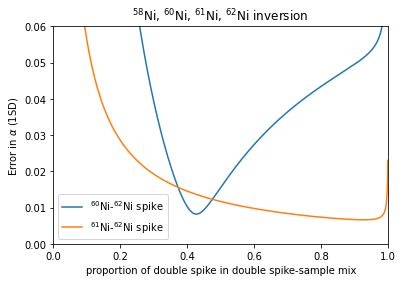

In [21]:
isodata_ni = ds.IsoData('Ni')
isoinv = [58,60,61,62]
spike6062 = [0.0132,0.3295,0.0014,0.6547,0.0012]
spike6162 = [0.0109,0.0081,0.4496,0.5297,0.0017]
# fix the sample intensity at 0.5 V for all runs
isodata_ni.set_errormodel(intensity=0.5, measured_type='fixed-sample')

ds.errorcurve(isodata_ni,spike6062,isoinv, label='$^{60}$Ni-$^{62}$Ni spike')
ds.errorcurve(isodata_ni,spike6162,isoinv, label='$^{61}$Ni-$^{62}$Ni spike')
plt.ylim([0,0.06])
plt.legend()
isodata_ni.set_errormodel() # return errormodel to defaults